# CNF Total Agent

Same as CNF agent, except it adds a total mines clause to account for the number of mines remaining on the board. 

In [1]:
import numpy as np
import itertools
from importlib import reload

import board as board 
import cnf_total_agent
import cnf_agent


import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Spawn board and agent 

Creating a specific board configuration where the total mines clauses help infer safe and mine cells

<IPython.core.display.Javascript object>


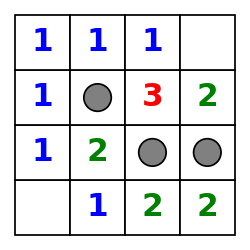

In [38]:
dim = 4
brd = board.Board(4, 3)

mines = [(1, 2), (2, 1), (3, 1)]

for i in range(dim):
    for j in range(dim): 
        brd.cells[i, j] = 0 

for mine in mines: 
    brd.cells[mine] = -1 
    
brd.assign_mine_counts()

In [39]:
brd._reveal_board()

In [26]:
agent = cnf_total_agent.CNF_Total_Agent(brd)
# agent.excavate_cell(0, 0)

In [27]:
agent.solve(log=True)

Excavated (0, 0)
Added -M(0, 0, idx:1) to knowledgebase.
Generating clauses at (0, 0, 1). 0 mines, 3 neighbors
Learned (1, 1) is safe via unit clause.
Learned (1, 0) is safe via unit clause.
Learned (0, 1) is safe via unit clause.
Excavated (0, 1)
Added -M(0, 1, idx:2) to knowledgebase.
Generating clauses at (0, 1, 2). 1 mines, 4 neighbors
Excavated (1, 0)
Added -M(1, 0, idx:5) to knowledgebase.
Generating clauses at (1, 0, 5). 1 mines, 3 neighbors
Excavated (1, 1)
Added -M(1, 1, idx:6) to knowledgebase.
Generating clauses at (1, 1, 6). 2 mines, 5 neighbors
Learned (2, 2) is safe via positive query.
Excavated (2, 2)
Added -M(2, 2, idx:11) to knowledgebase.
Generating clauses at (2, 2, 11). 3 mines, 7 neighbors
Attempting to add total mines to knowledgebase. 3/3
Added total mines clauses to knowledgebase. 3/3
**Learned (0, 2) is safe via positive query on totalmines.
**Learned (0, 3) is safe via positive query on totalmines.
**Learned (2, 0) is safe via positive query on totalmines.
**L

1.0

<IPython.core.display.Javascript object>


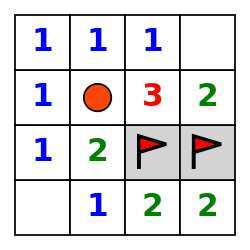

In [35]:
brd1 = board.Board(4, 3) 
brd1.cells = brd.cells

In [36]:
agent = cnf_agent.CNF_Agent(brd1)
# agent.excavate_cell(0, 0)

In [37]:
agent.solve(log=True)

Excavated (0, 0)
Added -M(0, 0, idx:1) to knowledgebase.
Generating clauses at (0, 0, 1). 0 mines, 3 neighbors
Learned (1, 1) is safe via unit clause.
Learned (1, 0) is safe via unit clause.
Learned (0, 1) is safe via unit clause.
Excavated (0, 1)
Added -M(0, 1, idx:2) to knowledgebase.
Generating clauses at (0, 1, 2). 1 mines, 4 neighbors
Excavated (1, 0)
Added -M(1, 0, idx:5) to knowledgebase.
Generating clauses at (1, 0, 5). 1 mines, 3 neighbors
Excavated (1, 1)
Added -M(1, 1, idx:6) to knowledgebase.
Generating clauses at (1, 1, 6). 2 mines, 5 neighbors
Learned (2, 2) is safe via positive query.
Excavated (2, 2)
Added -M(2, 2, idx:11) to knowledgebase.
Generating clauses at (2, 2, 11). 3 mines, 7 neighbors
	Randomly selected (2, 0) to uncover.
Excavated (2, 0)
Added -M(2, 0, idx:9) to knowledgebase.
Generating clauses at (2, 0, 9). 2 mines, 3 neighbors
Learned (2, 1) is a mine via negative query.
Toggled flag at (2, 1)
Added M(2, 1, idx:10) to knowledgebase.
	Randomly selected (1, 

0.6666666666666666

In [82]:
count = np.arange(1, 4**2-1)

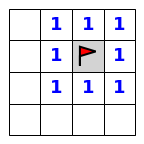

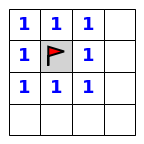

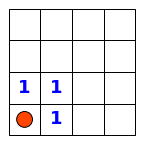

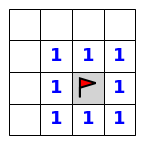

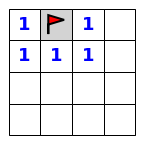

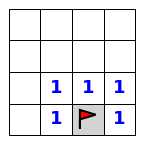

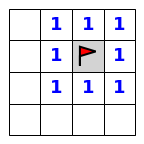

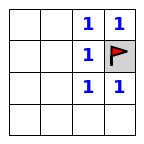

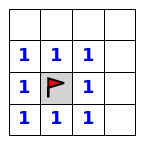

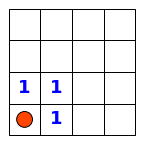

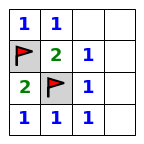

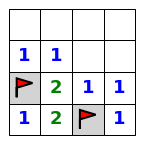

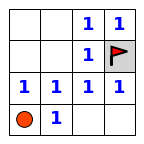

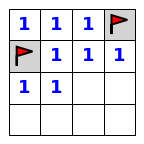

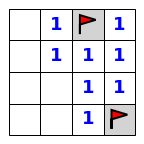

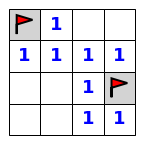

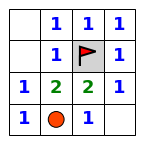

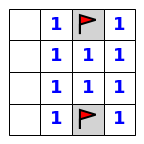

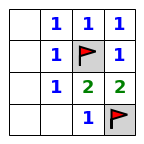

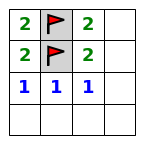

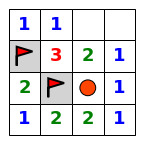

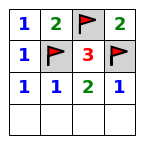

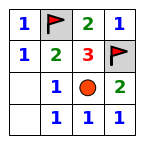

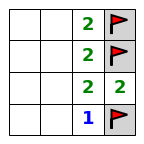

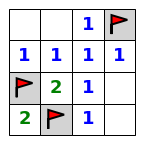

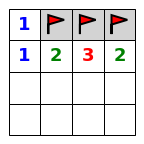

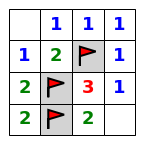

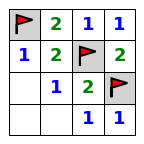

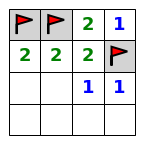

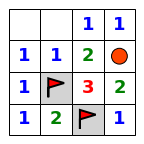

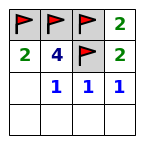

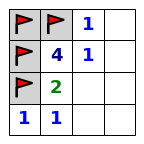

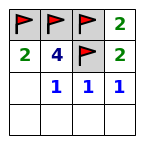

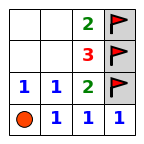

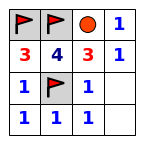

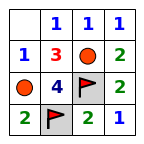

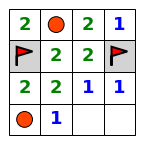

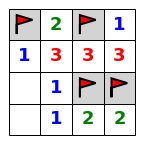

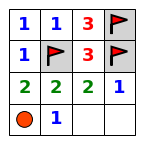

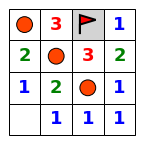

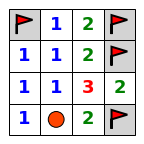

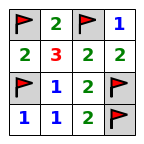

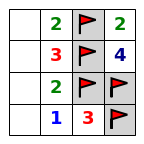

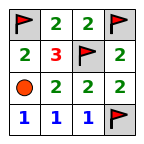

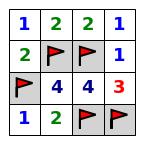

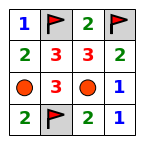

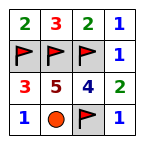

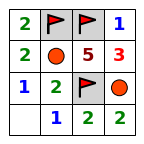

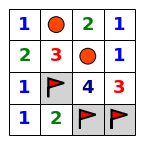

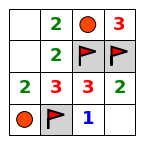

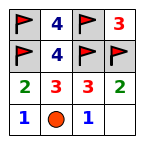

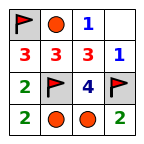

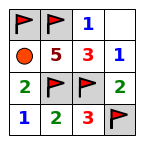

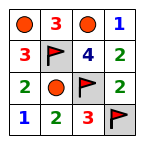

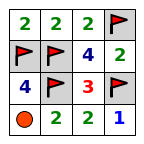

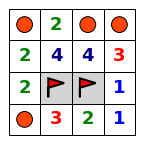

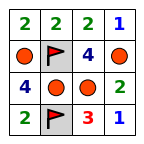

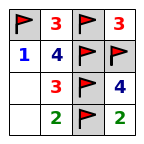

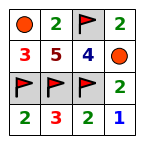

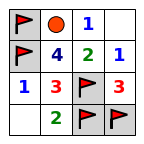

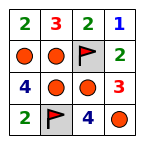

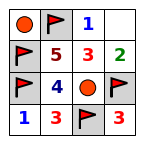

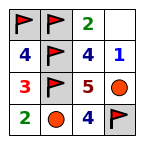

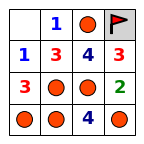

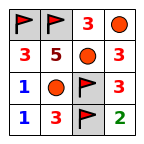

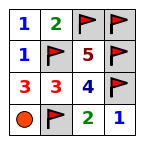

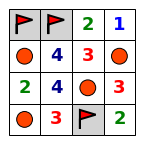

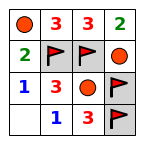

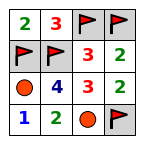

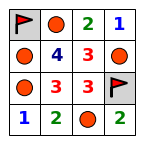

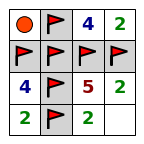

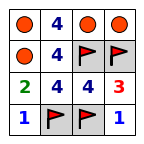

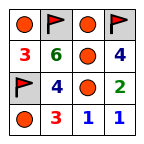

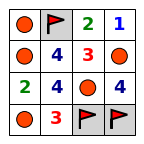

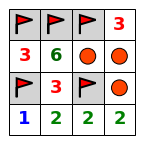

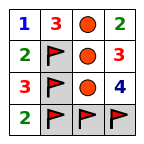

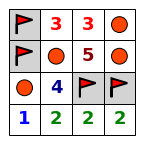

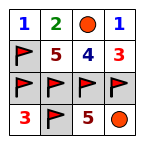

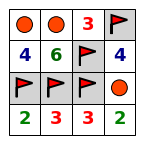

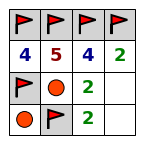

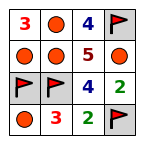

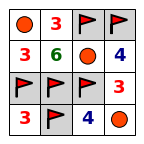

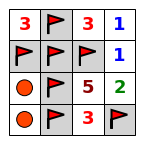

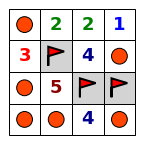

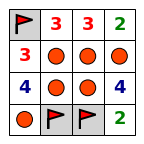

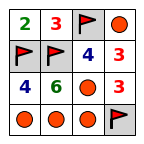

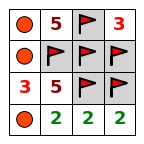

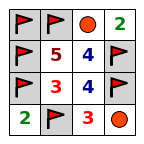

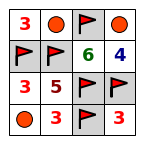

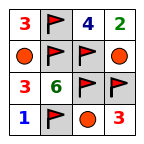

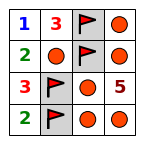

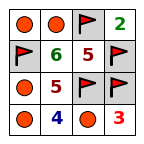

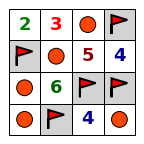

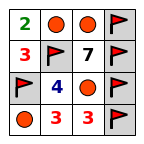

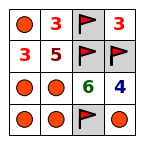

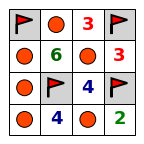

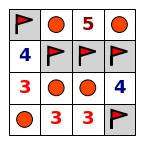

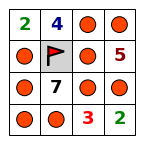

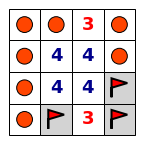

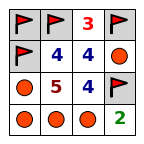

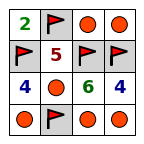

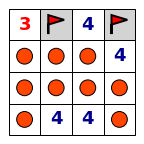

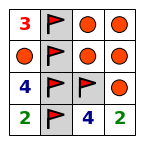

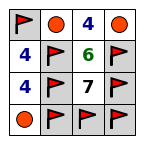

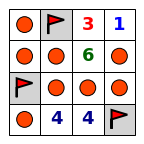

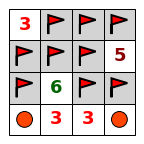

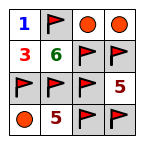

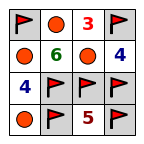

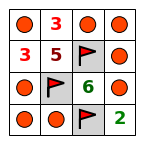

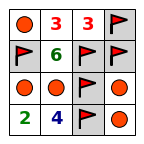

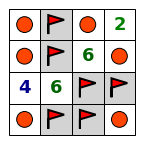

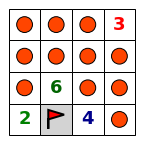

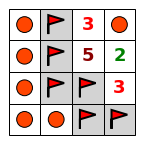

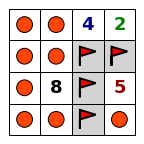

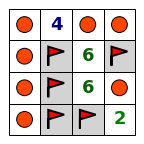

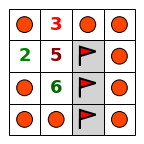

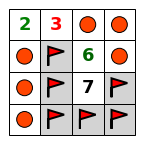

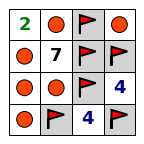

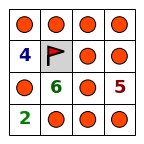

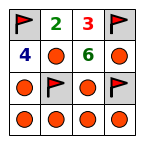

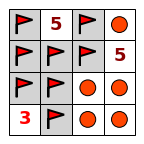

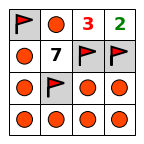

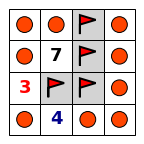

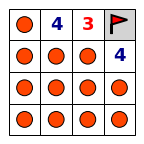

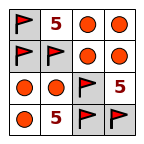

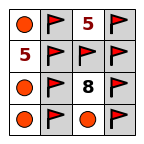

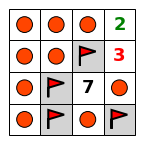

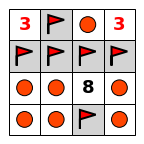

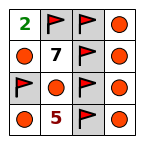

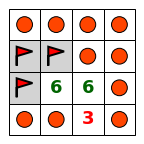

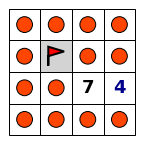

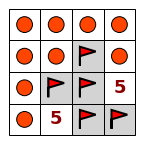

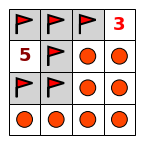

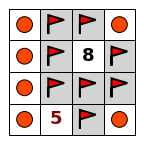

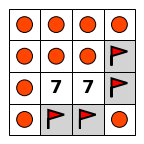

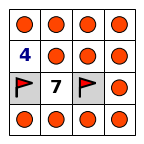

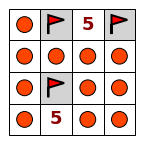

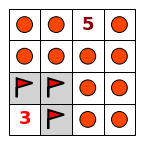

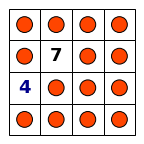

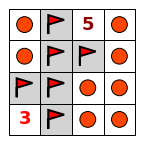

In [83]:
runs_per = 10
cnf_score = []

for mine_count in count: 
    
    density_score = 0
    
    for i in range(runs_per): 
    
        brd = board.Board(4, mine_count) 
        agent = cnf_agent.CNF_Agent(brd)
        agent.solve()
        
        density_score += brd.score
    
    cnf_score.append((mine_count, density_score/runs_per))

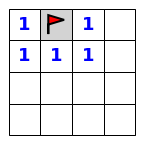

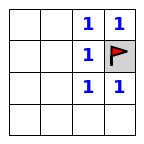

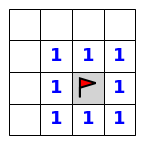

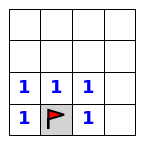

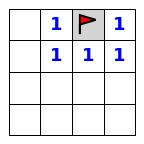

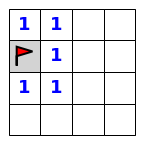

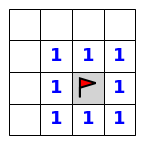

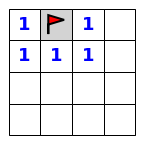

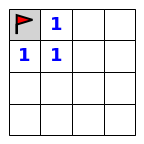

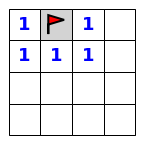

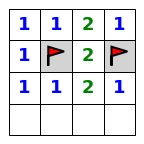

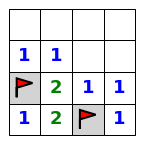

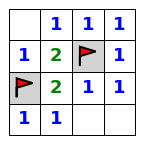

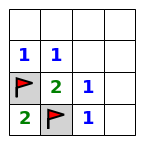

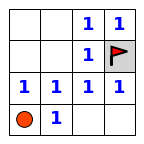

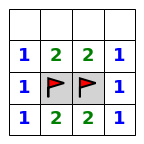

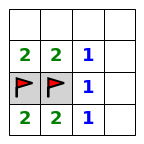

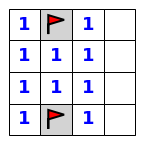

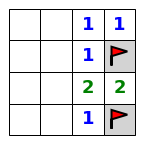

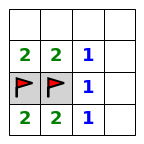

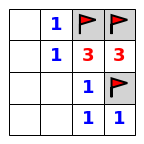

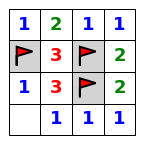

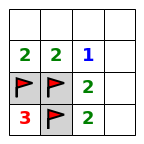

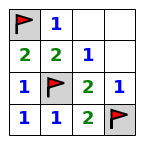

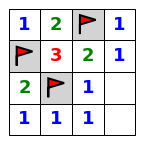

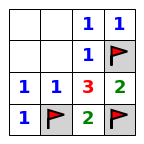

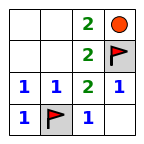

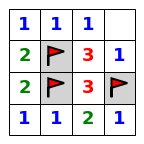

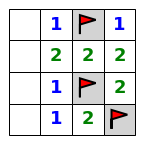

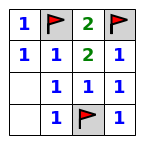

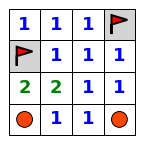

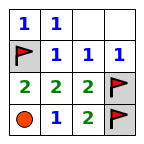

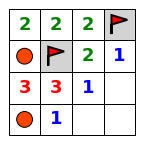

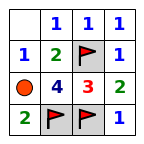

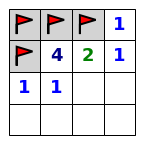

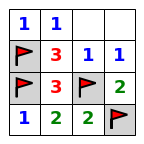

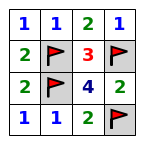

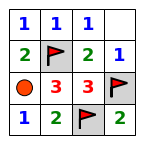

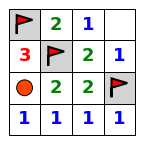

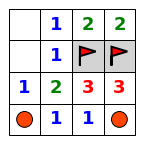

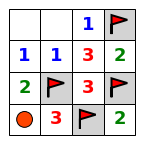

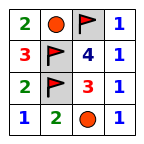

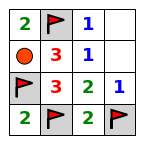

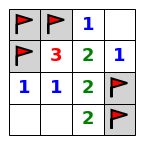

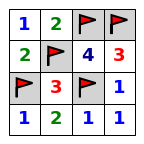

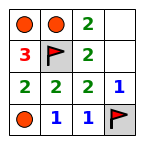

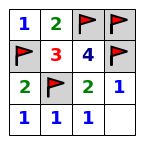

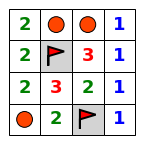

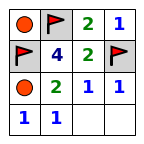

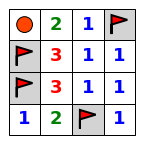

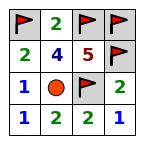

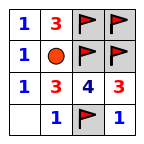

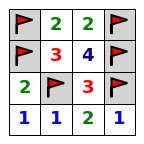

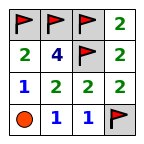

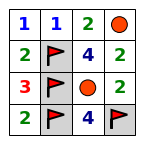

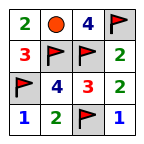

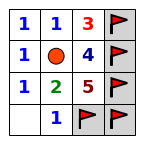

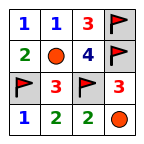

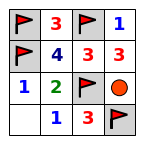

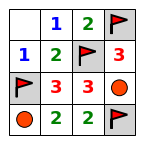

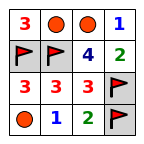

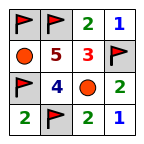

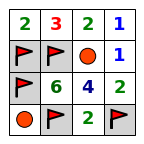

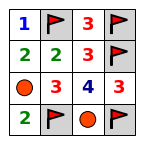

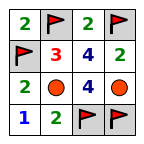

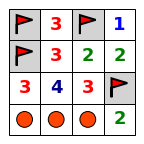

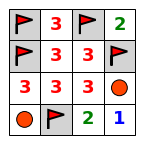

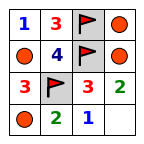

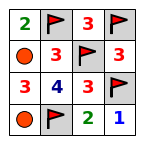

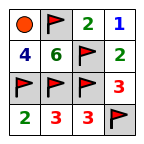

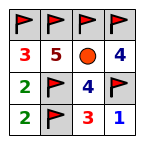

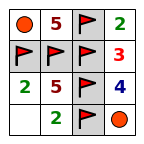

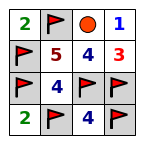

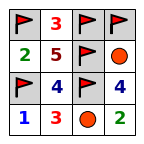

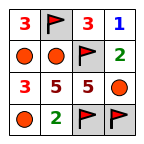

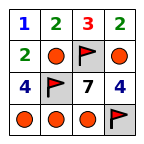

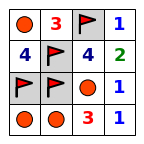

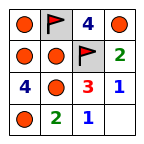

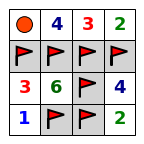

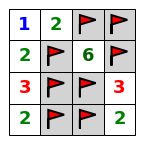

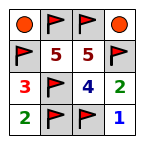

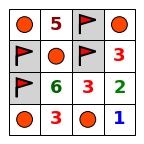

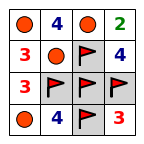

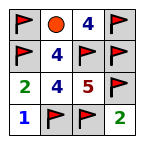

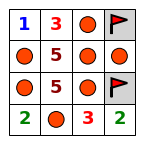

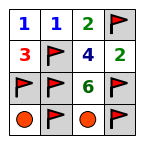

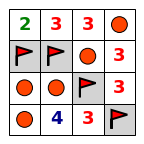

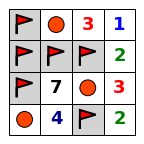

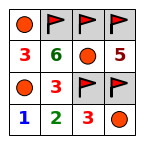

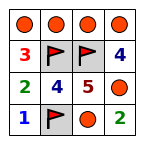

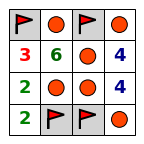

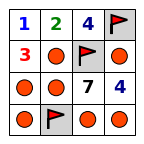

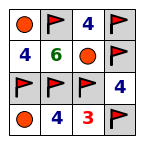

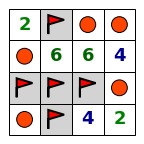

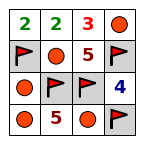

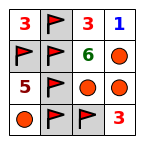

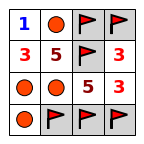

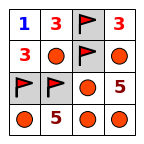

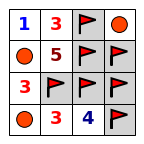

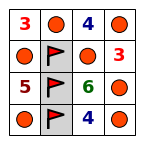

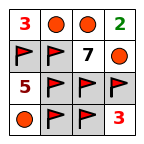

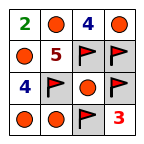

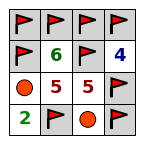

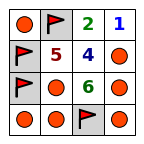

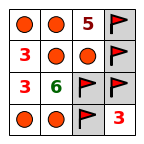

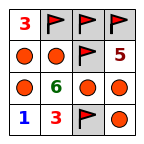

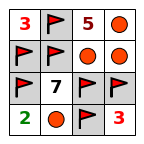

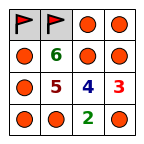

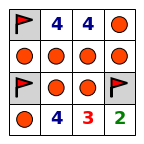

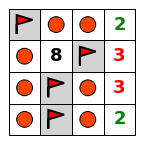

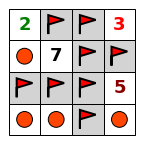

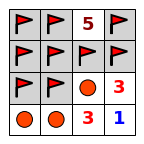

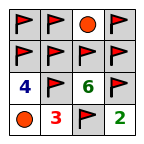

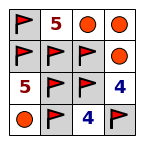

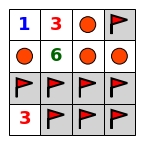

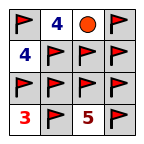

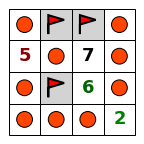

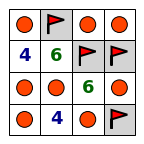

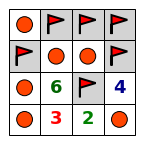

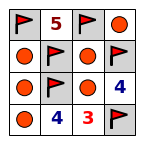

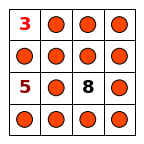

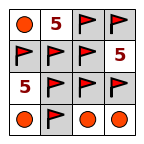

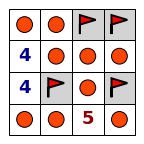

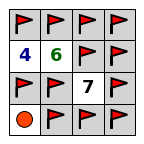

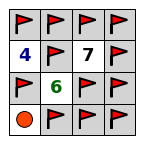

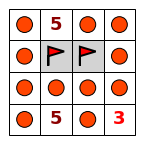

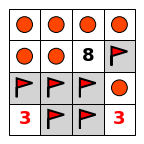

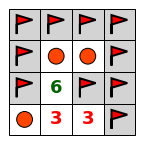

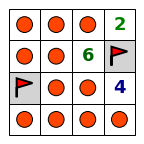

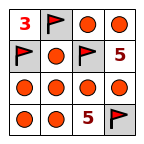

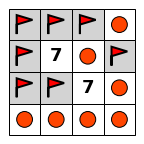

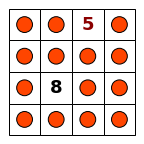

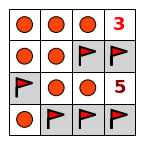

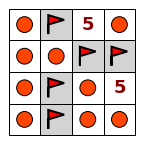

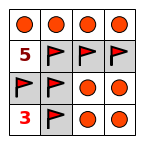

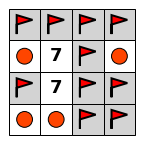

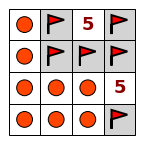

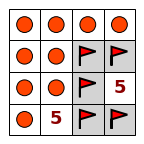

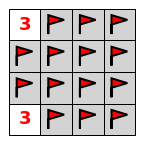

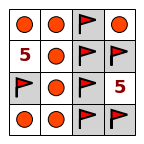

In [88]:
runs_per = 10
cnf_totmine_score = []

for mine_count in count: 
    
    density_score = 0
    
    for i in range(runs_per): 
    
        brd = board.Board(4, mine_count) 
        agent = cnf_total_agent.CNF_Total_Agent(brd)
        agent.solve()
        
        density_score += brd.score
    
    cnf_totmine_score.append((mine_count, density_score/runs_per))

In [92]:
cnf_score

[(1, 0.8),
 (2, 0.9),
 (3, 0.8999999999999998),
 (4, 0.75),
 (5, 0.7799999999999998),
 (6, 0.6666666666666667),
 (7, 0.5285714285714286),
 (8, 0.6),
 (9, 0.5777777777777778),
 (10, 0.41999999999999993),
 (11, 0.5090909090909091),
 (12, 0.35000000000000003),
 (13, 0.39230769230769236),
 (14, 0.27142857142857146)]

In [93]:
cnf_totmine_score

[(1, 1.0),
 (2, 0.95),
 (3, 0.9666666666666668),
 (4, 0.75),
 (5, 0.74),
 (6, 0.8),
 (7, 0.6714285714285715),
 (8, 0.675),
 (9, 0.5666666666666667),
 (10, 0.5),
 (11, 0.46363636363636357),
 (12, 0.6083333333333333),
 (13, 0.46923076923076923),
 (14, 0.4714285714285714)]

In [85]:
import seaborn as sns
%matplotlib inline

[Text(0, 0.5, 'average score'),
 Text(0.5, 0, 'mine count'),
 Text(0.5, 1.0, 'Comparing performance with and without total mine inference')]

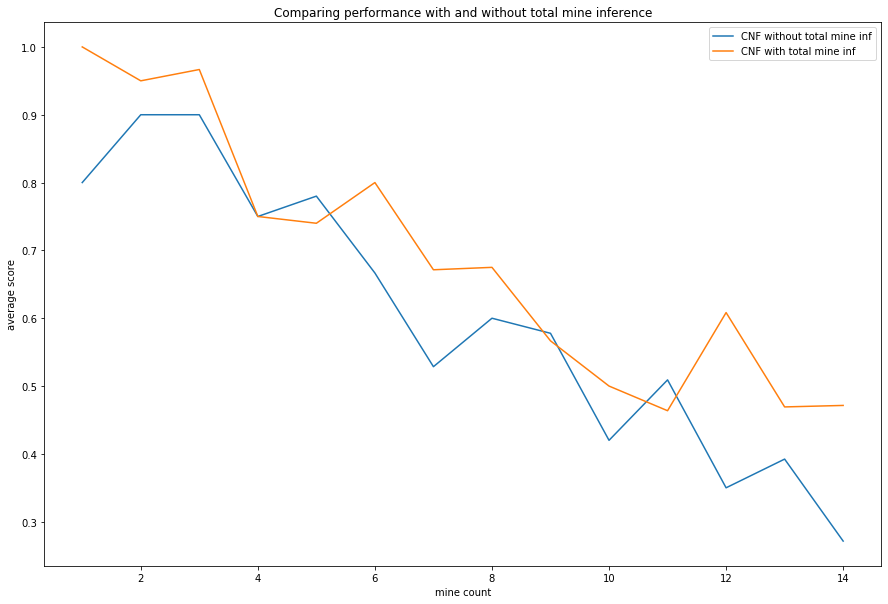

In [106]:
x = [i[0] for i in cnf_score]
y = [i[1] for i in cnf_score]

x1 = [i[0] for i in cnf_totmine_score]
y1 = [i[1] for i in cnf_totmine_score]

fig = plt.figure(figsize=(15, 10))

ax = sns.lineplot(x, y, label='CNF without total mine inf')
sns.lineplot(x1, y1, ax=ax, label='CNF with total mine inf')

ax.set(xlabel='mine count', ylabel='average score', title='Comparing performance with and without total mine inference')
